No null values found in the GTZAN dataset.
Principal component 1 corresponds to feature 'rolloff_var'
Principal component 2 corresponds to feature 'spectral_centroid_var'


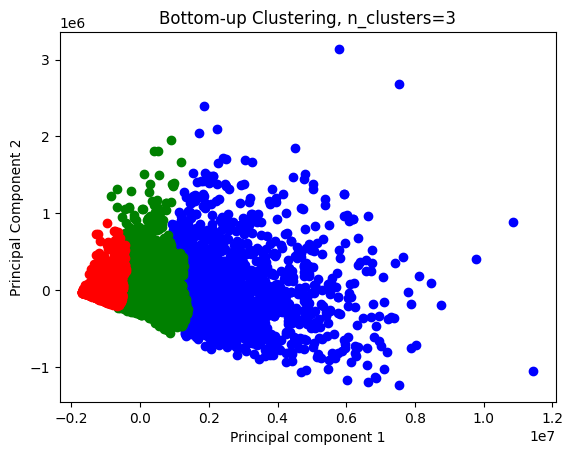

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
df = pd.read_csv('dataset.csv')

# Check for null values
null_count = df.isnull().sum().sum()
if null_count == 0:
    print("No null values found in the GTZAN dataset.")
else:
    print(f"{null_count} null values found in the GTZAN dataset.")

# Extract features and labels
X = df.iloc[:, 1:-1].astype(float).values
y = df.iloc[:, -1].values

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
feature_names = df.columns[1:-1].values
for i in range(pca.n_components_):
    component = pca.components_[i]
    feature_idx = np.abs(component).argmax()
    feature_name = feature_names[feature_idx]
    print(f"Principal component {i+1} corresponds to feature '{feature_name}'")

# Perform bottom-up clustering
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(X_pca)

# Plot the results
colors = ['blue', 'green', 'red', 'yellow', 'pink', 'orange', 'purple']
for k in range(n_clusters):
    cluster_samples = X_pca[labels == k]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], color=colors[k])
plt.title(f"Bottom-up Clustering, n_clusters={n_clusters}")
plt.xlabel('Principal component 1')
plt.ylabel('Principal Component 2')
plt.show()
